# 1. Processing JSON file and creation of a graph G

Parsing for the json files

In [1]:
import json
import networkx as nx
import itertools
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
data = json.load(open('/Users/gaetanocirianni/reduced_dblp.json'))
print(data)

[{'authors': [{'author': 'h&eacute;lio marcos paz de almeida', 'author_id': 255206}, {'author': 'dorgival olavo guedes neto', 'author_id': 255207}, {'author': 'wagner meira jr.', 'author_id': 16585}, {'author': 'mohammed j. zaki', 'author_id': 255208}], 'id_conference': 'conf/pkdd/2011-1', 'id_conference_int': 3052, 'id_publication': 'conf/pkdd/almeidanmz11', 'id_publication_int': 161535, 'title': 'is there a best quality metric for graph clusters?'}, {'authors': [{'author': 'beno&icirc;t fr&eacute;nay', 'author_id': 255280}, {'author': 'gael de lannoy', 'author_id': 255281}, {'author': 'michel verleysen', 'author_id': 3326}], 'id_conference': 'conf/pkdd/2011-1', 'id_conference_int': 3052, 'id_publication': 'conf/pkdd/frenaylv11', 'id_publication_int': 161584, 'title': 'label noise-tolerant hidden markov models for segmentation: application to ecgs.'}, {'authors': [{'author': 'nicola barbieri', 'author_id': 20405}, {'author': 'giuseppe manco', 'author_id': 20407}], 'id_conference': 'co

Define a dictionary to easily find the author ID for a given author name in input:

In [3]:
nameID = {}
for i in range (len(data)):
    for j in range(len(data[i]['authors'])):
        key = data[i]['authors'][j]['author']
        nameID[key] = data[i]['authors'][j]['author_id']

In [4]:
nameID['aris anagnostopoulos']

256176

Define a dictionary containing all the publications for a given author:

In [5]:
authorsDict = {} # For each author: authors_id & id_publication_int that they enjoyed
                 # the keys are the authors' ID's
'''
# If we need a dict of only author_id and author
for i in range(len(data)):
    for a in data[i]['authors']:
        for j in range(len(data[i]['authors'])):
            key = data[i]['authors'][j]['author_id']
            authorsDict[key] = data[i]['authors'][j]['author']
'''

# key: author id, value = list(publication1,pub2,...)
for i in range(len(data)):
    for author in data[i]['authors']: 
        for j in range(len(data[i]['authors'])):
            key = data[i]['authors'][j]['author_id'] # the key is the ID for every author
            if key in authorsDict.keys(): 
                if data[i]['id_publication_int'] not in authorsDict[key]:
                    authorsDict[key].append(data[i]['id_publication_int'])
            else:
                authorsDict[key] = [data[i]['id_publication_int']]
authorsDict

{255206: [161535],
 255207: [161535],
 16585: [161535],
 255208: [161535],
 255280: [161584],
 255281: [161584],
 3326: [161584],
 20405: [161623, 638442],
 20407: [161623, 638442],
 255339: [161641],
 205380: [161641],
 115228: [161641],
 210891: [161677],
 255394: [161677],
 255395: [161677],
 255405: [161687, 870141],
 9308: [161687, 383148, 383188],
 175195: [161687],
 17178: [161687],
 176994: [161717],
 73799: [161717],
 24151: [161717, 733292],
 255487: [161751],
 255488: [161751],
 3476: [161751],
 255489: [161751],
 166813: [161756],
 13781: [161756],
 9741: [161777],
 8757: [161777],
 255537: [161790],
 21462: [161790, 254014],
 255578: [161821],
 113776: [161888],
 255247: [161888],
 82068: [161888],
 255673: [161888],
 255688: [161896, 427806, 733432],
 255689: [161896],
 255690: [161896],
 255691: [161896],
 113346: [161920],
 15924: [161971, 254043, 426495, 639405],
 255814: [162007],
 200773: [162007],
 93126: [162021, 730272, 731280],
 23845: [162021],
 208589: [162021]

In [6]:
authorsDict.keys()

dict_keys([255206, 255207, 16585, 255208, 255280, 255281, 3326, 20405, 20407, 255339, 205380, 115228, 210891, 255394, 255395, 255405, 9308, 175195, 17178, 176994, 73799, 24151, 255487, 255488, 3476, 255489, 166813, 13781, 9741, 8757, 255537, 21462, 255578, 113776, 255247, 82068, 255673, 255688, 255689, 255690, 255691, 113346, 15924, 255814, 200773, 93126, 23845, 208589, 127810, 255902, 255926, 9503, 9505, 9068, 9046, 9069, 9070, 255950, 255996, 20199, 124828, 239007, 189237, 255823, 256123, 256124, 8985, 8987, 8988, 19285, 19460, 8612, 255494, 256146, 256147, 9771, 256148, 20336, 256176, 256177, 255328, 256188, 256159, 256133, 256264, 256265, 256276, 25696, 255805, 72882, 72883, 71582, 71969, 9772, 114626, 114625, 114483, 202882, 256135, 252278, 83637, 83639, 255300, 21056, 70758, 256482, 256500, 20392, 8857, 256366, 255759, 255760, 8874, 19794, 9451, 8350, 8352, 151570, 43462, 9388, 1632, 217858, 271609, 17344, 16239, 271610, 8819, 271611, 16249, 19355, 16145, 18433, 223848, 271612, 1

In [7]:
# To get authors for a given publication:
#for i in range(len(data)):
#    if data[i]['id_publication_int'] == 342780:
#        print(data[i])

Definition of the function for the Jaccard distance to use as weight for the edges for the graph:

In [7]:
# Function to find the Jaccardian distance
def DistJaccard(lst1, lst2):
    lst1 = set(lst1)
    lst2 = set(lst2)
    return (1-float(len(lst1.intersection(lst2))) / len(lst1.union(lst2)))

For checking the execution time:

In [8]:
start_time = datetime.now()

Creation of the graph G with the 'author_id':

In [9]:
G = nx.Graph()
for author_id in authorsDict.keys():
    G.add_node(author_id)

In [10]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 7771
Number of edges: 0
Average degree:   0.0000


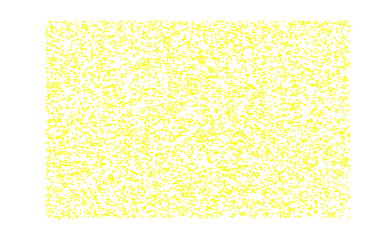

In [11]:
pos = nx.random_layout(G)
degrees = nx.degree(G)
nx.draw_networkx_nodes(G, pos, node_shape = "o", node_size = 0.5 , node_color = "yellow")
nx.draw_networkx_edges(G, pos, width = 0.2 , edge_color = "black", alpha = 0.5)
plt.axis('off')
plt.show()

In [12]:
# Loading all the publications ID's into a list for easy access
pubIdList = []
for i in range(len(data)):
    pubIdList.append(data[i]['id_publication_int'])
# 1. Create a list with all the authors' IDs for the authors wich enjoyed a conference
# 2. with intertools.combinations create all the possible pairs for each element in the list 
#    es: combinations('ABCD', 2) | AB AC AD CD
# 3. add an edge between the pairs created
for i in range(len(data)):
    authorList = []
    for j in range(len(data[i]['authors'])):
            authorList.append(data[i]['authors'][j]['author_id'])
    #for pubid in pubIdList:
     #   print(authorList)
    combinationsAll = list(itertools.combinations(authorList, 2))
    #print(combinationsAll)
    for k in combinationsAll :
        G.add_edge((k[0]), (k[1]), weight = 1 - DistJaccard(authorsDict[k[0]],authorsDict[k[1]] ))

In [13]:
print(combinationsAll)

[(205236, 143709), (205236, 205388), (205236, 143752), (143709, 205388), (143709, 143752), (205388, 143752)]


In [14]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 7771
Number of edges: 16489
Average degree:   4.2437


Duration: 0:00:18.244704


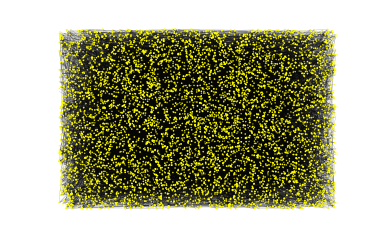

In [15]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time)) # for checking the speed
pos = nx.random_layout(G)
degrees = nx.degree(G)
nx.draw_networkx_nodes(G, pos, node_shape = "o", node_size =[v*0.075 for v in degrees.values()], node_color = "yellow")
nx.draw_networkx_edges(G, pos, width = 0.2 , edge_color = "black", alpha = 0.5)
plt.axis('off')
plt.show()

# 2. Some statistics and visualizations:

Create a list of IDs for the authors that have partecipated to a conference (in input):

In [16]:
authorsList=[]
conferenceInput = int(input("Enter the conference: "))
for i in range(len(data)):
    if data[i]['id_conference_int'] == conferenceInput :
        for j in range(len(data[i]['authors'])):
            data[i]['authors'][j]['author_id']
            authorsList.append(data[i]['authors'][j]['author_id'])

Enter the conference: 3052


In [17]:
authorsList

[255206,
 255207,
 16585,
 255208,
 255280,
 255281,
 3326,
 20405,
 20407,
 255339,
 205380,
 115228,
 210891,
 255394,
 255395,
 255405,
 9308,
 175195,
 17178,
 176994,
 73799,
 24151,
 255487,
 255488,
 3476,
 255489,
 166813,
 13781,
 9741,
 8757,
 255537,
 21462,
 255578,
 113776,
 255247,
 82068,
 255673,
 255688,
 255689,
 255690,
 255691,
 113346,
 15924,
 255814,
 200773,
 93126,
 23845,
 208589,
 127810,
 255902,
 255926,
 9503,
 9505,
 9068,
 9046,
 9069,
 9070,
 255950,
 255996,
 20199,
 124828,
 239007,
 189237,
 255823,
 256123,
 256124,
 8985,
 8987,
 8988,
 19285,
 19460,
 8612,
 255494,
 256146,
 256147,
 9771,
 256148,
 20336,
 256176,
 256177,
 255328,
 256188,
 256159,
 256133,
 256264,
 256265,
 256124,
 256276,
 25696,
 255805,
 72882,
 72883,
 71582,
 71969,
 9772,
 114626,
 114625,
 114483,
 202882,
 256135,
 252278,
 83637,
 83639,
 255300,
 21056,
 70758,
 256482,
 256500,
 255902,
 20392,
 8857,
 256366,
 255759,
 255760,
 8874,
 19794,
 9451,
 8350,
 8352,


(a): Given the conference in input, return the subgraph induced by the set of authors who have published at the input conference at least once.

Authors IDs by ax


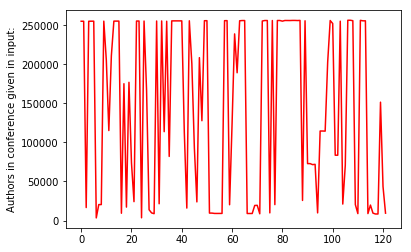

Name: 
Type: Graph
Number of nodes: 120
Number of edges: 117
Average degree:   1.9500


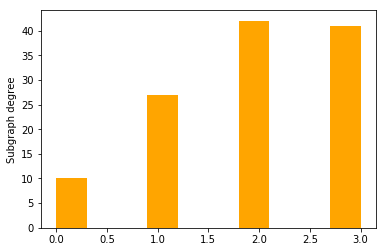

Subgraph induced:


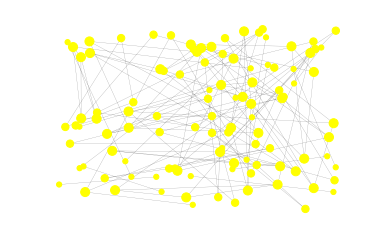

In [18]:
confG = G.subgraph(authorsList)
map(int, authorsList)
plt.plot(authorsList, color = "red")
print('Authors IDs by ax')
plt.ylabel('Authors in conference given in input:')
plt.show()
print(nx.info(confG))
degDict = nx.degree(confG)
keyList = []
degList = []
for keys in degDict.keys():
    keyList.append(keys)
    degList.append(degDict[keys])
#plt.plot(degList, keyList)
plt.hist(degList, color= "orange") #histogram for the distribution of graph degrees in the subgraph
plt.ylabel('Subgraph degree')
plt.show()
print('Subgraph induced:')
pos = nx.random_layout(confG)
nx.draw_networkx_nodes(confG, pos, node_shape = "o", node_size = [v*27 for v in degDict.values()] , node_color = "yellow")
nx.draw_networkx_edges(confG, pos, width = 0.2 , edge_color = "black", alpha = 0.5)
plt.axis('off')
plt.show()

# Now we have the graph. Computation of some centralities measures and plot them.

# Closeness centrality:
Represents the mean distance between a given node and all the others.

Closeness Centrlality histogram:


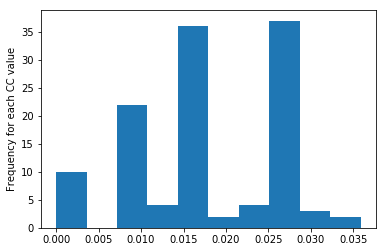

In [19]:
closenessDict = nx.closeness_centrality(confG)
keyList = []
closenessList = []
for keys in closenessDict.keys():
    keyList.append(keys)
    closenessList.append(closenessDict[keys])
x = keyList
y = closenessList
print('Closeness Centrlality histogram:')
plt.ylabel('Frequency for each CC value')
plt.hist(y)
plt.show()

In [20]:
closenessDict

{3326: 0.01680672268907563,
 3476: 0.025210084033613446,
 8350: 0.01680672268907563,
 8352: 0.01680672268907563,
 8612: 0.01680672268907563,
 8757: 0.008403361344537815,
 8857: 0.008403361344537815,
 8874: 0.025210084033613446,
 8985: 0.01680672268907563,
 8987: 0.01680672268907563,
 8988: 0.01680672268907563,
 9046: 0.025210084033613446,
 9068: 0.025210084033613446,
 9069: 0.025210084033613446,
 9070: 0.025210084033613446,
 9308: 0.025210084033613446,
 9388: 0.01680672268907563,
 9451: 0.01680672268907563,
 9503: 0.035854341736694675,
 9505: 0.02987861811391223,
 9741: 0.008403361344537815,
 9771: 0.025210084033613446,
 9772: 0.01680672268907563,
 13781: 0.008403361344537815,
 15924: 0.015126050420168067,
 16585: 0.025210084033613446,
 17178: 0.025210084033613446,
 19285: 0.01680672268907563,
 19460: 0.01680672268907563,
 19794: 0.025210084033613446,
 20199: 0.008403361344537815,
 20336: 0.0,
 20392: 0.008403361344537815,
 20405: 0.008403361344537815,
 20407: 0.008403361344537815,
 21

# Betweeness centrality:
It is a measure of centrality based on the shortest paaths.
Fore every pair of vertices in a conncted graph, there exists at least one shortest path between the vertices such that the sum of the weights of the edegs, for a weighted graph is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex.

 Betweeness Centrality histogram:


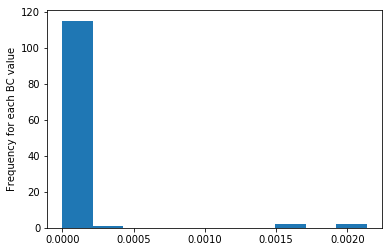

In [21]:
betweennessDict = nx.betweenness_centrality(confG)
keyList = []
betweennessList = []
for keys in betweennessDict.keys():
    keyList.append(int(keys))
    betweennessList.append(betweennessDict[keys])
print(' Betweeness Centrality histogram:')
plt.hist(betweennessList)
plt.ylabel('Frequency for each BC value')
plt.show()

In [22]:
betweennessDict

{3326: 0.0,
 3476: 0.0,
 8350: 0.0,
 8352: 0.0,
 8612: 0.0,
 8757: 0.0,
 8857: 0.0,
 8874: 0.0,
 8985: 0.0,
 8987: 0.0,
 8988: 0.0,
 9046: 0.0,
 9068: 0.0,
 9069: 0.0,
 9070: 0.0,
 9308: 0.0,
 9388: 0.0,
 9451: 0.0,
 9503: 0.0021364477994587666,
 9505: 0.0,
 9741: 0.0,
 9771: 0.0,
 9772: 0.0,
 13781: 0.0,
 15924: 0.0,
 16585: 0.0,
 17178: 0.0,
 19285: 0.0,
 19460: 0.0,
 19794: 0.0,
 20199: 0.0,
 20336: 0.0,
 20392: 0.0,
 20405: 0.0,
 20407: 0.0,
 21056: 0.0,
 21462: 0.0,
 23845: 0.0,
 24151: 0.0,
 25696: 0.0,
 43462: 0.0,
 70758: 0.0,
 71582: 0.0,
 71969: 0.0,
 72882: 0.0,
 72883: 0.0,
 73799: 0.0,
 82068: 0.0,
 83637: 0.0,
 83639: 0.0,
 93126: 0.001709158239567013,
 113346: 0.0,
 113776: 0.0,
 114483: 0.0,
 114625: 0.0,
 114626: 0.0,
 115228: 0.0,
 124828: 0.0,
 127810: 0.0,
 151570: 0.0,
 166813: 0.0,
 175195: 0.0,
 176994: 0.0,
 189237: 0.0,
 200773: 0.0,
 202882: 0.0,
 205380: 0.0,
 208589: 0.0,
 210891: 0.0,
 239007: 0.0,
 252278: 0.0,
 255206: 0.0,
 255207: 0.0,
 255208: 0.0,
 25

(b): Given in input an author and an integer d, get the subgraph induced by the nodes that have hop distance at most equal to d with the input author. Then, visualize the graph.

In [23]:
author = int(input("Enter the author ID: "))
d = int(input("Enter the distance: "))
def neighbourhood(a, dist, graph):
    l = []
    l.extend(G.neighbors(a))    
    for i in range(dist - 1):
        for el in l:
            l.extend(G.neighbors(el))
            l = list(set(l))
    return l   
output = neighbourhood(author, d, G)

Enter the author ID: 10
Enter the distance: 4


In [24]:
output

[71680,
 10,
 118802,
 260118,
 20506,
 20507,
 114729,
 356399,
 2095,
 16435,
 426037,
 426038,
 524355,
 16452,
 118856,
 489545,
 524360,
 501840,
 53334,
 53335,
 137306,
 82011,
 524383,
 829535,
 489581,
 20596,
 20598,
 8312,
 243843,
 71827,
 16536,
 829594,
 489630,
 16542,
 489631,
 16558,
 829625,
 71867,
 16583,
 8393,
 16589,
 272605,
 272606,
 278757,
 20711,
 256237,
 12527,
 364789,
 10494,
 35071,
 364806,
 364807,
 364808,
 364822,
 364823,
 61721,
 489764,
 364842,
 364843,
 504106,
 63791,
 8497,
 364856,
 364857,
 16703,
 162112,
 8513,
 322,
 272711,
 272712,
 272713,
 16722,
 489811,
 489812,
 303452,
 364904,
 364905,
 8556,
 8557,
 364913,
 491893,
 256394,
 489884,
 256420,
 260517,
 256423,
 364968,
 119221,
 225741,
 8657,
 121298,
 8659,
 365014,
 365015,
 365016,
 489945,
 16867,
 365042,
 18932,
 115205,
 8724,
 18965,
 285215,
 51755,
 16940,
 8750,
 113210,
 113212,
 94793,
 365139,
 16979,
 447062,
 447063,
 447064,
 16998,
 289387,
 365163,
 365167,


In [25]:
G1 = G.subgraph(output)
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 350
Number of edges: 1120
Average degree:   6.4000


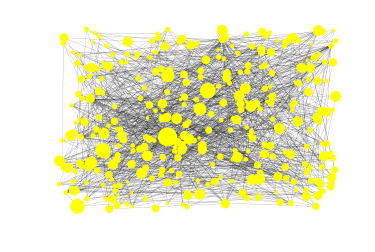

In [26]:
pos = nx.random_layout(G1)
nx.draw_networkx_nodes(G1, pos, node_shape = "o", node_size = [v*6 for v in degrees.values()] , node_color = "yellow")
nx.draw_networkx_edges(G1, pos, width = 0.2 , edge_color = "black", alpha = 0.5)
plt.axis('off')
plt.show()

# 3. Compute some generalized version of the Erdos number

(a): Verify the presence of a path between Aris and the input author:

In [27]:
authorID = int(input("Enter the ID of the author you want to compute the distance from Aris: "))
nx.has_path(G, source = authorID, target = 256176)

Enter the ID of the author you want to compute the distance from Aris: 10


True

In [28]:
def Dijkstra(graph, source, target):    
    dist = {}
    prev = {}
    visited = set()
    for v in graph:
        dist[v] = float('inf')
        prev[v] = None
    dist[source] = 0

    while sum(1 for k, v in dist.items() if k not in visited and v < float('inf')):
        sorted_x = [v for v in sorted(dist, key=dist.get) if v not in visited]
        u = sorted_x[0]
        if u in visited:
            continue
        visited.add(u)
        if u == target:
            break

        for v in graph.neighbors(u):
            alt = dist[u] + graph[u][v]['weight']
            if alt < dist[v]:
                dist[v] = alt
                prev[v] = u
            
    return dist[target]                

In [29]:
Dijkstra(G, authorID, 256176)

0.6428403897444145

(b): Take in input a subset of nodes (cardinality smaller than 21) and returns, for each node of the graph, its GroupNumber, defined as the minimum SP between u and v, where v is a node in the graph and u belongs to I, which is the set of input nodes.

In [ ]:
subset = list(map(int, input('Insert a subset (of cardinality smaller than 21) of nodes: ').split(" ")))
for j in subset:
    for i in G.nodes():    
        if nx.has_path(G, i, j):
            print("The Group Number for ", i, "with", j, "is: ", Dijkstra(G, i, j))

Insert a subset (of cardinality smaller than 21) of nodes: 10
The Group Number for  20405 with 10 is:  1.12027355599337
The Group Number for  20407 with 10 is:  1.12027355599337
The Group Number for  255405 with 10 is:  1.8954609116373815
The Group Number for  9308 with 10 is:  1.645460911637382
The Group Number for  175195 with 10 is:  1.978794244970715
The Group Number for  17178 with 10 is:  1.978794244970715
The Group Number for  255537 with 10 is:  0.9606893106893106
The Group Number for  21462 with 10 is:  0.4606893106893106
The Group Number for  255688 with 10 is:  0.5956099456099456
The Group Number for  255689 with 10 is:  0.9289432789432789
The Group Number for  255690 with 10 is:  0.9289432789432789
The Group Number for  255691 with 10 is:  0.9289432789432789
The Group Number for  15924 with 10 is:  0.4285546754587002
The Group Number for  8985 with 10 is:  0.4608437314319668
The Group Number for  8987 with 10 is:  0.39893896952720487
The Group Number for  8988 with 10 is:  

The Group Number for  19242 with 10 is:  0.7262259369457512
The Group Number for  17917 with 10 is:  0.7262259369457512
The Group Number for  210526 with 10 is:  0.7262259369457512
The Group Number for  18803 with 10 is:  0.7262259369457512
The Group Number for  40393 with 10 is:  0.7262259369457512
The Group Number for  20793 with 10 is:  0.8621386353584495
The Group Number for  272067 with 10 is:  0.6954719686917828
The Group Number for  272068 with 10 is:  0.7413170163170164
The Group Number for  16617 with 10 is:  0.6954719686917828
The Group Number for  272071 with 10 is:  0.4813565519447873
The Group Number for  272083 with 10 is:  0.39893896952720487
The Group Number for  256423 with 10 is:  0.47036754095577626
The Group Number for  20596 with 10 is:  0.47036754095577626
The Group Number for  17027 with 10 is:  0.8441770647653001
The Group Number for  19305 with 10 is:  1.1775103980986334
The Group Number for  18825 with 10 is:  1.3441770647653
The Group Number for  21377 with 1

The Group Number for  18262 with 10 is:  0.9536068893267037
The Group Number for  16757 with 10 is:  1.1536068893267037
The Group Number for  256125 with 10 is:  1.3464640321838464
The Group Number for  16758 with 10 is:  1.0964640321838464
The Group Number for  230008 with 10 is:  1.4153901653901655
The Group Number for  16965 with 10 is:  1.4153901653901655
The Group Number for  272610 with 10 is:  1.4153901653901655
The Group Number for  272614 with 10 is:  1.6153901653901652
The Group Number for  272615 with 10 is:  1.6153901653901652
The Group Number for  85767 with 10 is:  0.9817204424402567
The Group Number for  16611 with 10 is:  0.9277521884720027
The Group Number for  8315 with 10 is:  0.7277521884720027
The Group Number for  12238 with 10 is:  1.6059274059274058
The Group Number for  259741 with 10 is:  1.1059274059274058
The Group Number for  16695 with 10 is:  1.1059274059274058
The Group Number for  16415 with 10 is:  1.1059274059274058
The Group Number for  17356 with 10